## Sentiment Analysis of old Tweets
Using the ´twitter_samples´ corpus provided by nltk

First, we will import nltk and download the corpus and all neccessary tools:

In [1]:
! pip install nltk
import nltk
nltk.download(["stopwords", "twitter_samples", "vader_lexicon"])

tweets = nltk.corpus.twitter_samples.strings()

nltk.download('punkt')
from nltk.tokenize import TweetTokenizer, sent_tokenize
tt = TweetTokenizer()
st = sent_tokenize

     |████████████████████████████████| 1.5 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 303 kB 27.3 MB/s eta 0:00:01
     |████████████████████████████████| 720 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 6.3 MB/s  eta 0:00:01


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In a second step, the tweets are tokenized and filtered for stopwords:

In [2]:
tokens = []
for tweet in tweets:
    tokens.extend(tt.tokenize(tweet))
    
stopwords = nltk.corpus.stopwords.words("english")
tokens = [ token for token in tokens if token not in stopwords]

now we want to find out the frequency of all words that are left:

In [6]:
fd = nltk.FreqDist(tokens)
print (fd)
print('The most frequent token is: \'' + fd.max() + '\'')

<FreqDist with 42349 samples and 433767 outcomes>
The most frequent token is: ':'


*':'* seems to be the most frequent token. However,we are searching for some more interesting words...

In [7]:
print(fd.most_common(50))
print('\n')
print('The word \'work\' occurs:', fd['work'], 'times')
print('The word \'people\' occurs:', fd['people'], 'times')
print('The word \'like\' occurs:', fd['like'], 'times')

[(':', 17091), ('.', 15021), ('RT', 13539), (',', 9244), ('…', 6429), ('Miliband', 5222), ('I', 4931), ('"', 4749), (':(', 4592), ('!', 4591), ('SNP', 4491), ('Tories', 3923), (':)', 3738), ('?', 3557), ('-', 2912), ('Ed', 2687), ("'", 2476), ('(', 2460), ('Cameron', 2419), ('...', 2347), ('Labour', 2341), ('%', 2301), ('#bbcqt', 2106), ('The', 2029), ('David', 1672), ('Farage', 1640), (')', 1634), ('Tory', 1531), ('rather', 1530), ('UKIP', 1519), ('&', 1458), ('would', 1414), ('/', 1352), ('let', 1346), ('deal', 1212), ('work', 1186), ('#AskNigelFarage', 1168), ("I'm", 1150), ('vote', 1139), ('If', 1137), ('http', 1104), ('like', 1046), ('support', 974), ('Clegg', 956), ('people', 948), ('going', 941), ('get', 925), ('#UKIP', 911), ('Nigel', 902), ('want', 893)]


The word 'work' occurs: 1186 times
The word 'people' occurs: 948 times
The word 'like' occurs: 1046 times


It seems clear that these twitter posts were all about politics in Great Britain! However, since I don't know too much about british politics and therefore would not be able to enjoy the results of this exercise as much, I prefere to choose 3 words that are not directly connected to the topic.
I opt for: *'work'*, *'people'* and *'like'*.

Let's find out wether people talk in a positive or negative way when they use these 3 words!
To do this, we first need to get all sentences which include the 3 words, since the nltk SentimentIntensityAnalyzer only works with full sentences.

In [8]:
sentences = []
for tweet in tweets:
    sentences.extend(st(tweet))

tokenized_sentences = []
for sentence in sentences:
    tokenized_sentences.append(tt.tokenize(sentence))
    
print(tokenized_sentences[:5])

work = [item for item in tokenized_sentences if 'work' in item]
people = [item for item in tokenized_sentences if 'people' in item]
like = [item for item in tokenized_sentences if 'like' in item]
print('\n')
print('Number of sentences containing \'work\':', len(work))
print('Example for a sentence containing \'work\':', work[0], '\n')
print('Number of sentences containing \'people\':', len(people))
print('Number of sentences containing \'like\':', len(like))

[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.'], ['Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'the', 'waste', 'basket', '.'], [':(']]


Number of sentences containing 'work': 1181
Example for a sentence containing 'work': ['Dang', 'starting', 'next', 'week', 'I', 'have', '"', 'work', '"', ':('] 

Number of sentences containing 'people': 917
Number of sentences containing 'like': 1018


Since we now have lists of sentences that contain our words of interest, we can feed them to the SentimentIntensityAnalyzer:

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

work_joined = []
for sentences in work:
    work_joined.extend([' '.join(sentence) for sentence in work])
    
for sentence in work_joined:
    average_neg_work = sum(sia.polarity_scores(sentence)["neg"] for sentence in work_joined) / len(work_joined)
    average_pos_work = sum(sia.polarity_scores(sentence)["pos"] for sentence in work_joined) / len(work_joined)    

print('The average negative sentiment when using the word \'work\' is: ' + "{:.2f}".format(average_neg_work) + ', the average positive sentiment is: ' + "{:.2f}".format(average_pos_work))
    
people_joined = []
for sentences in people:
    people_joined.extend([' '.join(sentence) for sentence in people])
    
for sentence in people_joined:
    average_neg_people = sum(sia.polarity_scores(sentence)["neg"] for sentence in people_joined) / len(people_joined)
    average_pos_people = sum(sia.polarity_scores(sentence)["pos"] for sentence in people_joined) / len(people_joined)    

print('The average negative sentiment when using the word \'people\' is: ' + "{:.2f}".format(average_neg_people) + ', the average positive sentiment is: ' + "{:.2f}".format(average_pos_people))
    
like_joined = []
for sentences in like:
    like_joined.extend([' '.join(sentence) for sentence in like])
    
for sentence in like_joined:
    average_neg_like = sum(sia.polarity_scores(sentence)["neg"] for sentence in like_joined) / len(like_joined)
    average_pos_like = sum(sia.polarity_scores(sentence)["pos"] for sentence in like_joined) / len(like_joined)    

print('The average negative sentiment when using the word \'like\' is: ' + "{:.2f}".format(average_neg_like) + ', the average positive sentiment is: ' + "{:.2f}".format(average_pos_like))

Since it's always nice to actually see results rather than just read numbers, we will now display the average positive and negative sentiment score as stacked bar plots:

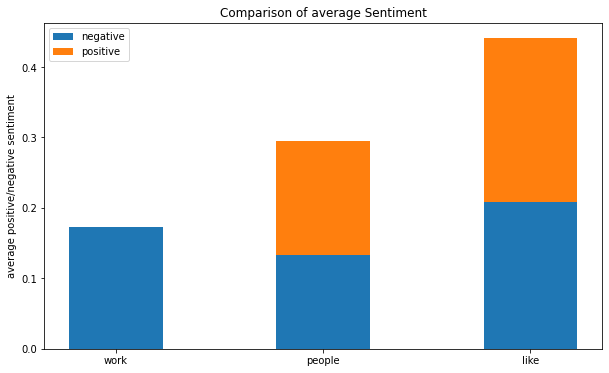

In [26]:
! pip install matplotlib
import matplotlib.pyplot as plt

labels = ['work', 'people', 'like']    
A = [average_neg_work, average_neg_people, average_neg_like]
B = [average_pos_work, average_pos_people, average_pos_like]
width = 0.45

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.set_ylabel('average sentiment')
ax.set_title('Comparison of average Sentiment')


ax.bar(labels, A, width, label='negative', c="tab:red")
ax.bar(labels, B, width, bottom=A, label='positive', c="yellowgreen")
ax.legend()
plt.show()